In [1]:
import pandas as pd
from plotnine import ggplot, ggtitle, geom_line, coord_cartesian, aes
from siuba import filter, _

In [2]:
df = pd.read_csv("output/simulations-202206.csv")
df.head()

,model,auc_train,auc_test,delta,n_models,imbalance,n_trees
0,OverUnder RF,0.9166,0.8866,0.0300,100,0.85,100
1,custom RF,0.9033,0.8779,0.0254,100,0.85,100
2,Stratified RF,0.9033,0.8775,0.0258,100,0.85,100
3,class_weight balanced RF,0.9005,0.8745,0.0260,100,0.85,100
4,sklearn RF,0.8907,0.8681,0.0226,100,0.85,100


/home/timvink/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
/home/timvink/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: output/train.png


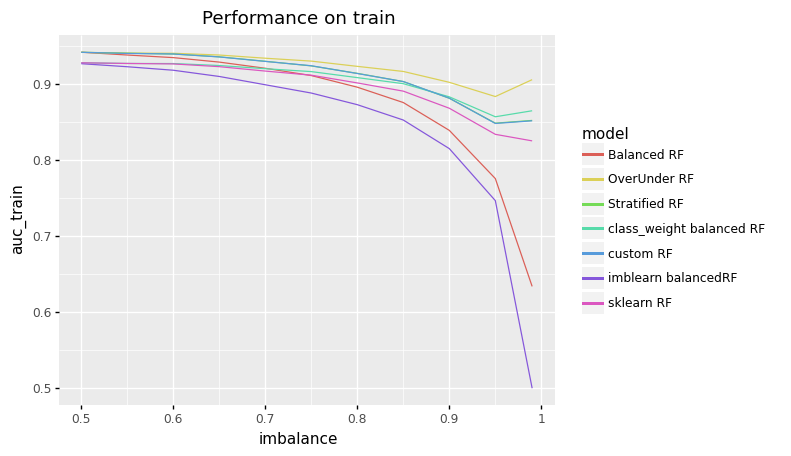

<ggplot: (8785008380218)>

In [6]:
p = (df
 >> filter(_.n_trees == 100)
 >> ggplot(aes(x = 'imbalance', group = 'model')) +
  ggtitle("Performance on train") + 
  geom_line(aes(y = 'auc_train', color = 'model')) #+ 
  # coord_cartesian(ylim = [.95, .99])
)

p.save(filename="output/train.png", height=5, width=8, units="in", dpi=1000)
p

/home/timvink/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
/home/timvink/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: output/test.png


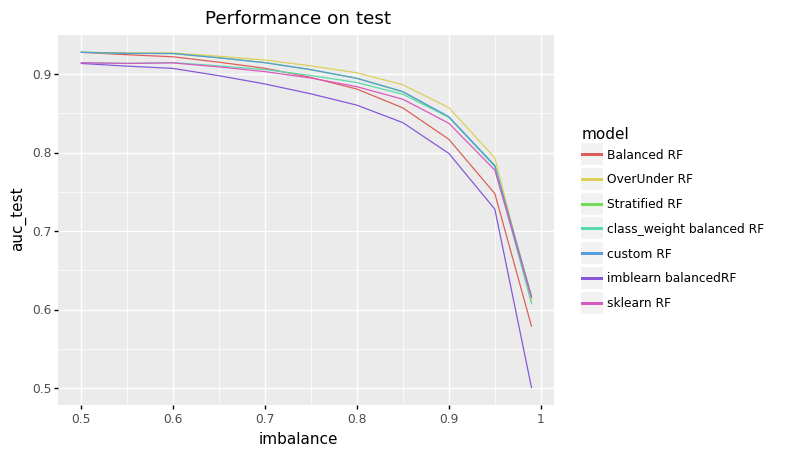

<ggplot: (8785008384940)>

In [7]:
p = (df
 >> filter(_.n_trees == 100)
 >> ggplot(aes(x = 'imbalance', group = 'model')) +
  ggtitle("Performance on test") + 
  geom_line(aes(y = 'auc_test', color = 'model')) #+ 
  # coord_cartesian(ylim = [.92, .955])
)

p.save(filename="output/test.png", height=5, width=8, units="in", dpi=1000)
p

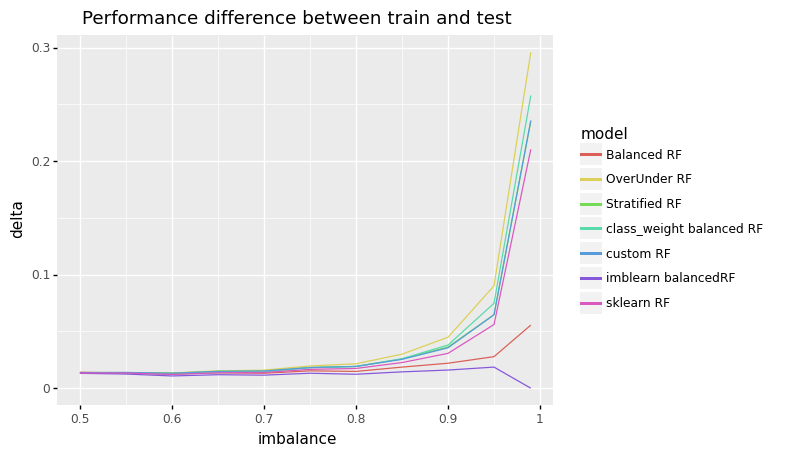

<ggplot: (8785017015083)>

In [5]:
(df
 >> filter(_.n_trees == 100)
 >> ggplot(aes(x = 'imbalance', group = 'model')) +
  ggtitle("Performance difference between train and test") + 
  geom_line(aes(y = 'delta', color = 'model'))
)